### Урок 3.
Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных

#### Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [1]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

In [5]:
grad = pd.DataFrame({
       'salary' : [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]
})

In [6]:
grad

,salary
0,100
1,80
2,75
3,77
4,89
5,33
6,45
7,25
8,65
9,17


Среднее арифметическое:

In [7]:
mean_salary = grad['salary'].sum() / grad['salary'].count()
mean_salary

65.3

In [8]:
grad['salary'].mean()

65.3

Среднее квадратичное отклонение:

In [9]:
(grad['salary'] - grad['salary'].mean()) ** 2

0     1204.09
1      216.09
2       94.09
3      136.89
4      561.69
5     1043.29
6      412.09
7     1624.09
8        0.09
9     2332.89
10    1246.09
11    1705.69
12      68.89
13     106.09
14      22.09
15      94.09
16       0.09
17     349.69
18     610.09
19    7174.09
Name: salary, dtype: float64

In [10]:
salary_std = np.sqrt(((grad['salary'] - grad['salary'].mean()) ** 2).sum() / grad['salary'].count())
salary_std

30.823854398825596

In [18]:
grad['salary'].std()

31.624607341019814

Cмещенная оценка дисперсии:

In [16]:
salary_variance = ((grad['salary'] - grad['salary'].mean()) ** 2).sum() / grad['salary'].count()
salary_variance

950.11

In [19]:
grad['salary'].var(ddof=0)

950.11

Несмещенная оценка дисперсии:

In [17]:
salary_variance2 = ((grad['salary'] - grad['salary'].mean())**2).sum() / (grad['salary'].count() - 1)
salary_variance2

1000.1157894736842

In [20]:
grad['salary'].var(ddof=1)

1000.1157894736842

#### Задача 2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выбросы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

Найти первый квартиль -  квантиль порядка  0.25 

In [21]:
grad['salary'].quantile(0.25)

42.0

Найти третий квартиль -  квантиль порядка  0.75 

In [24]:
grad['salary'].quantile(0.75)

81.0

Интерквартильное расстояние

In [25]:
iqr = grad['salary'].quantile(0.75) - grad['salary'].quantile(0.25)
iqr

39.0

<AxesSubplot:>

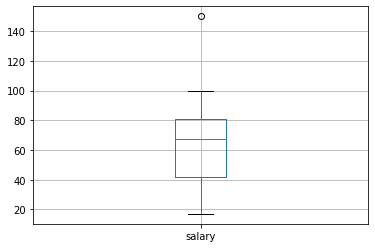

In [26]:
grad[['salary']].boxplot()

Значения зарплаты выше 100 можно считать выбросом.

##### Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

Вероятность того что студент из факультета A: $P(B_1) = 0.25$

Вероятность того что студент из факультета В: $P(B_2) = 0.25$

Вероятность того что студент из факультета С: $P(B_3) = 0.5$

Вероятность того, что студент факультета A сдаст первую сессию:  $P(A\:|\:B_1) = 0.8$ 

Вероятность того, что студент факультета B сдаст первую сессию: $P(A\:|\:B_2) = 0.7$

Вероятность того, что студент факультета C сдаст первую сессию: $P(A\:|\:B_3) = 0.9$ 

Общая вероятность сдачи 1 сессии -  $P(A)$ (полная вероятность)

$$P(A) = P(B_1) \cdot P(A | B_1) + P(B_2) \cdot P(A | B_2) + P(B_3) \cdot P(A | B_3)$$

$$P(A) = 0.25 \cdot 0.8 + 0.25 \cdot 0.7 + 0.5 \cdot 0.9 = 0.825$$

Тогда по формуле Байеса: $$P(B\:|\:A) = \frac{P(A\:|\:B) \cdot P(B)}{P(A)}$$

Получим для студента из факультета А: $$P(B_1\:|\:A) = \frac{P(A\:|\:B_1) \cdot P(B_1)}{P(A)} = \frac{0.8 \cdot0.25}{0.825} = 0,2424$$

Получим для студента из факультета В: $$P(B_2\:|\:A) = \frac{P(A\:|\:B_2) \cdot P(B_2)}{P(A)} = \frac{0.7 \cdot0.25}{0.825} = 0,2121$$

Получим для студента из факультета С: $$P(B_3\:|\:A) = \frac{P(A\:|\:B_3) \cdot P(B_3)}{P(A)} = \frac{0.9 \cdot0.5}{0.825} = 0,5454$$